In [27]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "retail-rocket-clean-purchases-by-category"
[2] "retail-rocket-cleaned-events-dataset"

# Retail Rocket Capstone – Google Data Analytics

**Author:** [Ciana Ellington]  
**Date:** [02/08/2026]  
**Course:** Google Data Analytics Capstone  
**Tagline:** Analyzing user behavior to optimize e-commerce conversions and revenue


### Executive Summary
This analysis explores user behavior on the Retail Rocket e-commerce platform to identify conversion bottlenecks, peak purchasing times, and high-performing products. Using over 2.7 million user events, the analysis reveals a significant drop-off between product views and add-to-cart actions, indicating opportunities to improve product page engagement. Purchase activity peaks during early evening hours, and a small number of product categories and items account for a large share of total purchases. These insights support targeted recommendations to improve conversion rates, marketing effectiveness, and customer retention.




## Key Findings  

- **Conversion Bottleneck:** Only **2.6%** of users who view products add them to their cart, and just **0.84%** complete a purchase. The largest drop-off occurs at the **view-to-add-to-cart stage**, highlighting a critical area for improvement.  
- **Peak Purchase Hours:** Purchases peak between **6–8 PM**, indicating the optimal window for marketing campaigns and promotions.  
- **High-Performing Categories and Items:** The **top 10 product categories** contribute approxima


In [28]:
# Load libraries (if you haven't already)
library(readr)
library(dplyr)
library(ggplot2)

# Load cleaned events dataset
events <- read_csv("/kaggle/input/retail-rocket-cleaned-events-dataset/clean_events.csv", show_col_types = FALSE)

# Load cleaned purchase items dataset
purchase_items <- read_csv("/kaggle/input/retail-rocket-clean-purchases-by-category/clean_purchase_items.csv", show_col_types = FALSE)

# Quick check of the datasets
glimpse(events)
glimpse(purchase_items)


Rows: 2,755,641
Columns: 10
$ timestamp     <dbl> 1.433221e+12, 1.433224e+12, 1.433222e+12, 1.433222e+12, …
$ visitorid     <dbl> 257597, 992329, 111016, 483717, 951259, 972639, 810725, …
$ event         <chr> "view", "view", "view", "view", "view", "view", "view", …
$ itemid        <dbl> 355908, 248676, 318965, 253185, 367447, 22556, 443030, 4…
$ transactionid <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ datetime      <dttm> 2015-06-02 05:02:12, 2015-06-02 05:50:14, 2015-06-02 05…
$ date          <date> 2015-06-02, 2015-06-02, 2015-06-02, 2015-06-02, 2015-06…
$ month         <dttm> 2015-06-01, 2015-06-01, 2015-06-01, 2015-06-01, 2015-06…
$ hour          <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ purchased     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
Rows: 21,982
Columns: 3
$ visitorid  <dbl> 599528, 121688, 552148, 102019, 189384, 350566, 350566, 404…
$ itemid     <dbl> 356475, 15335, 81345, 150318, 310791, 54058, 2848

**Insight:** Most activity comes from product views (96%), while add-to-cart (2.6%) and purchase (0.84%) are much lower. This indicates a major engagement drop-off early in the funnel.


## Conversion Funnel

The funnel shows how users progress through key actions: viewing items, adding to cart, and making purchases.  
Understanding drop-offs allows us to pinpoint stages for conversion improvement.



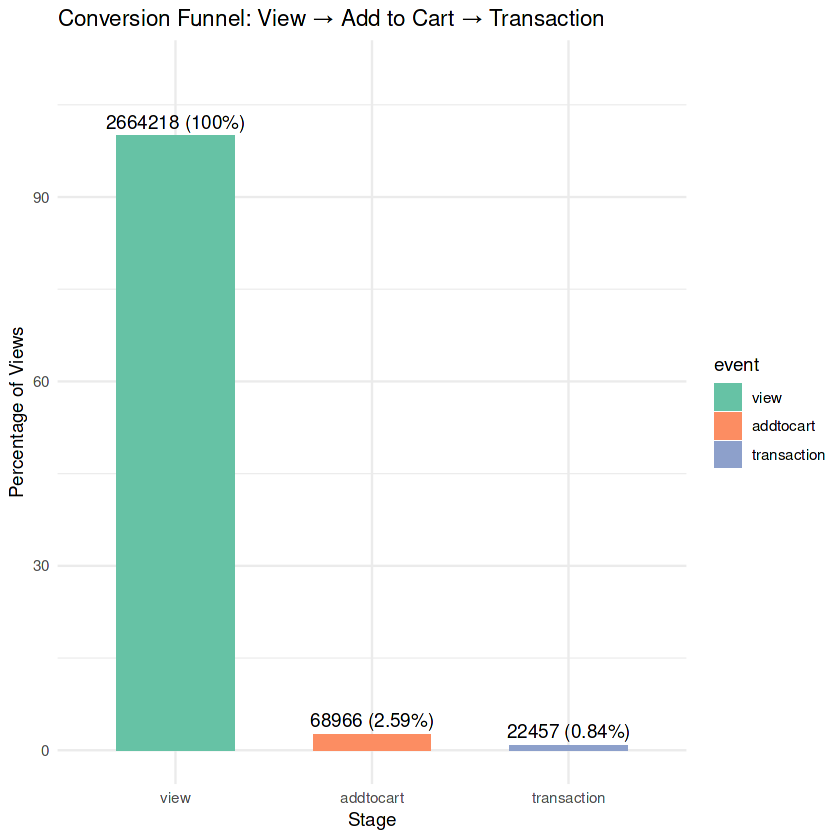

In [29]:
library(dplyr)

funnel <- data.frame(
  event = c("view", "addtocart", "transaction"),
  count = c(2664218, 68966, 22457)
)

# Calculate percentage relative to views
funnel <- funnel %>%
  mutate(percent = round((count / max(count)) * 100, 2),
         event = factor(event, levels = c("view", "addtocart", "transaction")))
library(ggplot2)

ggplot(funnel, aes(x = event, y = percent, fill = event)) +
  geom_col(width = 0.6) +
  geom_text(aes(label = paste0(count, " (", percent, "%)")), vjust = -0.5) +
  ylim(0, 110) +
  theme_minimal() +
  labs(
    title = "Conversion Funnel: View → Add to Cart → Transaction",
    x = "Stage",
    y = "Percentage of Views"
  ) +
  scale_fill_brewer(palette = "Set2")




**Insight:** Only 2.6% of users who view products add them to their cart, and just 0.84% complete a purchase. The largest drop-off occurs between viewing and add-to-cart actions, indicating a critical opportunity to improve product page engagement and calls-to-action.


## Purchases by Hour of Day

This bar chart shows the number of purchases for each hour of the day.  

Key points to observe:  
- The chart reveals the **peak shopping hours**, showing when customers are most active.  
- Early morning hours (0:00–6:00) typically have the **fewest purchases**.  
- Evening hours often show **higher purchase activity**, which can inform marketing strategies or site optimizations.  
- This visualization helps understand **hourly purchasing trends** in the Retail Rocket dataset.


In [30]:
# Install packages if not already installed
if (!require(dplyr)) install.packages("dplyr")
if (!require(ggplot2)) install.packages("ggplot2")

# Load libraries
library(dplyr)
library(ggplot2)

# Load CSV from Kaggle dataset
clean_events <- read.csv("/kaggle/input/retail-rocket-cleaned-events-dataset/clean_events.csv")

# Ensure 'purchased' is numeric
clean_events$purchased <- as.numeric(as.character(clean_events$purchased))

# Ensure 'hour' is numeric
clean_events$hour <- as.numeric(as.character(clean_events$hour))

# Filter only purchased events
purchases <- clean_events %>%
  filter(purchased == 1)

# Aggregate purchases by hour
purchases_by_hour <- purchases %>%
  group_by(hour) %>%
  summarise(count = n())

# Check aggregated data
print(purchases_by_hour)



# A tibble: 24 × 2
    hour count
   <dbl> <int>
 1     0  1119
 2     1  1037
 3     2  1012
 4     3   836
 5     4   747
 6     5   747
 7     6   477
 8     7   278
 9     8   106
10     9    70
# ℹ 14 more rows


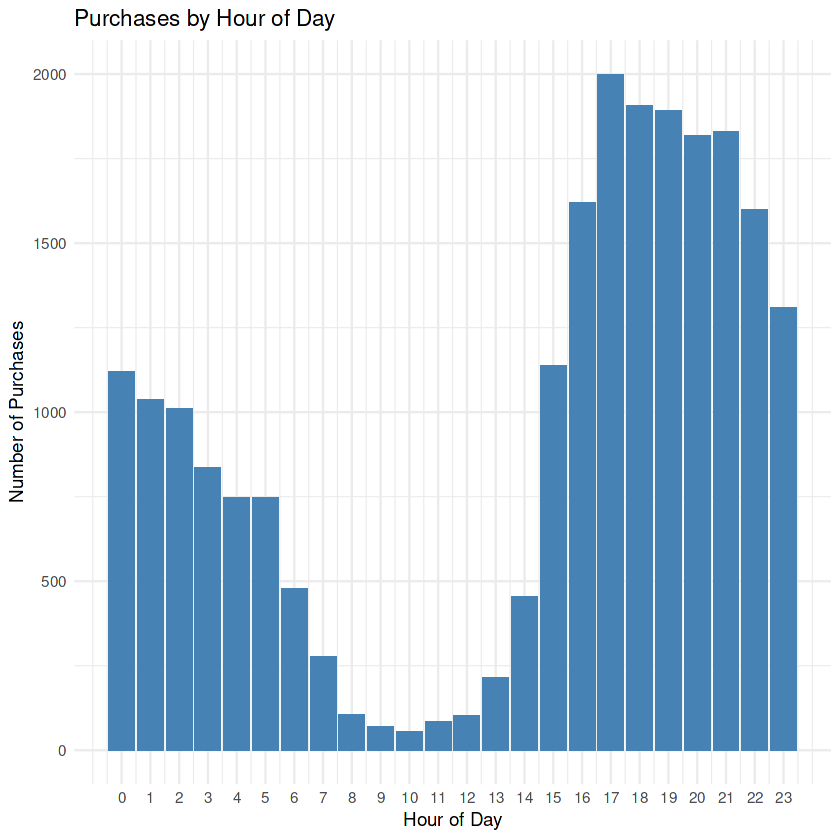

In [31]:
ggplot(purchases_by_hour, aes(x = hour, y = count)) +
  geom_col(fill = "steelblue") +
  labs(title = "Purchases by Hour of Day",
       x = "Hour of Day",
       y = "Number of Purchases") +
  scale_x_continuous(breaks = 0:23) +
  theme_minimal()


## Purchases by Hour of Day

**Insight:** Purchase activity increases throughout the afternoon and peaks during early evening hours (approximately 5–8 PM), suggesting this is the most effective window for marketing campaigns and promotional messaging.



In [32]:
library(readr)
library(dplyr)
library(ggplot2)   # for charts later


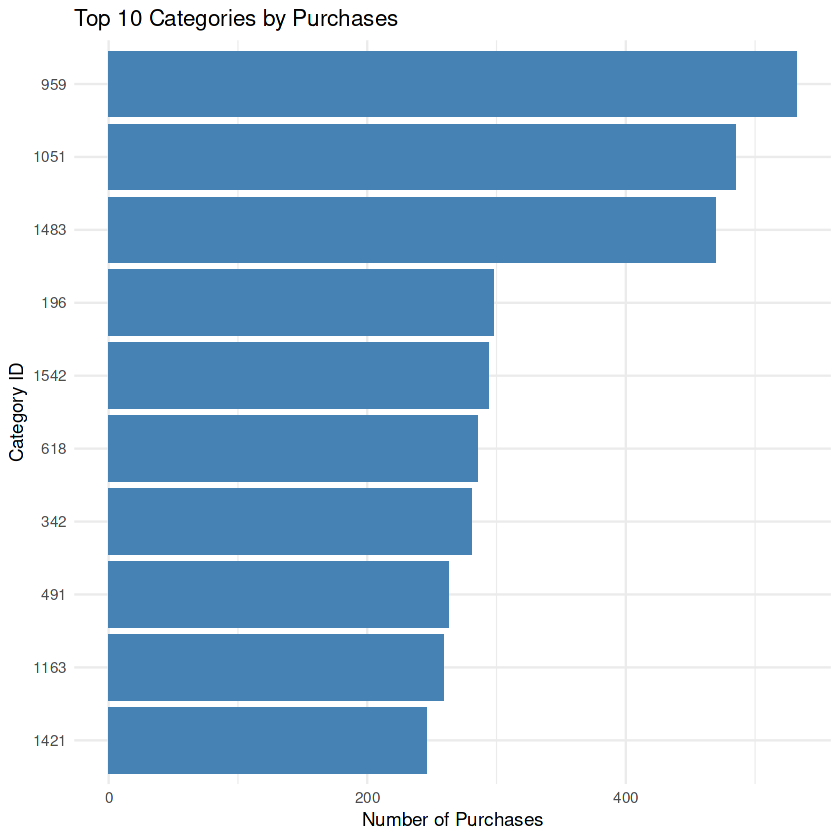

In [33]:
# Summarize total purchases per category
top_categories <- purchase_items %>%
  group_by(categoryid) %>%
  summarise(total_purchases = n()) %>%
  arrange(desc(total_purchases))

# Keep top 10 categories
top_categories_10 <- top_categories %>% slice_max(total_purchases, n = 10)

# Plot
ggplot(top_categories_10, aes(x = reorder(as.factor(categoryid), total_purchases), y = total_purchases)) +
  geom_col(fill = "steelblue") +
  coord_flip() +  # flips x and y so categories read nicely
  labs(
    title = "Top 10 Categories by Purchases",
    x = "Category ID",
    y = "Number of Purchases"
  ) +
  theme_minimal()


## Top Product Categories

**Insight:** A small number of product categories account for a large share of total purchases, indicating that customer demand is concentrated within a limited set of categories.



## Top 10 Items per Purchase

This highlights specific high-value products, allowing targeted promotions and inventory focus.



Rows: 21,982
Columns: 3
$ visitorid  <dbl> 599528, 121688, 552148, 102019, 189384, 350566, 350566, 404…
$ itemid     <dbl> 356475, 15335, 81345, 150318, 310791, 54058, 284871, 150100…
$ categoryid <dbl> 386, 1098, 1393, 1236, 437, 618, 1421, 1483, 575, 196, 352,…


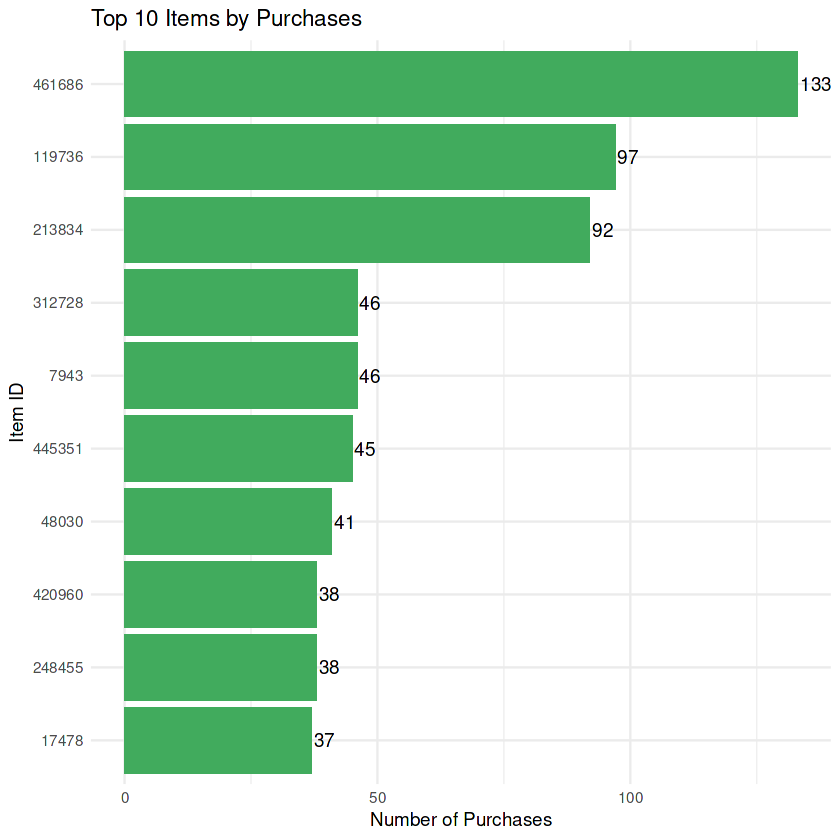

In [34]:
# Load libraries
library(tidyverse)

# Step 1 — Load CSV from Kaggle input quietly
clean_purchase_items <- read_csv(
  "/kaggle/input/retail-rocket-clean-purchases-by-category/clean_purchase_items.csv",
  show_col_types = FALSE
)

# Quick look at the data
glimpse(clean_purchase_items)

# Step 2 — Aggregate Top 10 Items by Purchases
top_items <- clean_purchase_items %>%
  group_by(itemid) %>%
  summarise(total_purchases = n()) %>%
  arrange(desc(total_purchases)) %>%
  slice_head(n = 10)

# Step 3 — Plot the Top 10 Items
ggplot(top_items, aes(x = reorder(itemid, total_purchases), y = total_purchases)) +
  geom_col(fill = "#41ab5d") +
  coord_flip() +  # Horizontal bars
  geom_text(aes(label = total_purchases), hjust = -0.1) +  # Add numbers outside bars
  labs(
    title = "Top 10 Items by Purchases",
    x = "Item ID",
    y = "Number of Purchases"
  ) +
  theme_minimal()


## Purchase Behavior

**Insight:** A small number of items drive a disproportionately high number of purchases, suggesting opportunities to prioritize these products in promotions and inventory planning.




## Customer Loyalty Drivers: Top 10 Items by Purchases per Customer


In [35]:
library(dplyr)

# Compute total purchases, unique customers, and purchases per customer
purchases_per_customer <- purchases %>%
  group_by(itemid) %>%
  summarise(
    total_purchases = n(),
    unique_customers = n_distinct(visitorid),
    purchases_per_customer = total_purchases / unique_customers
  ) %>%
  arrange(desc(purchases_per_customer)) %>%
  slice_head(n = 10)  # Top 10 items


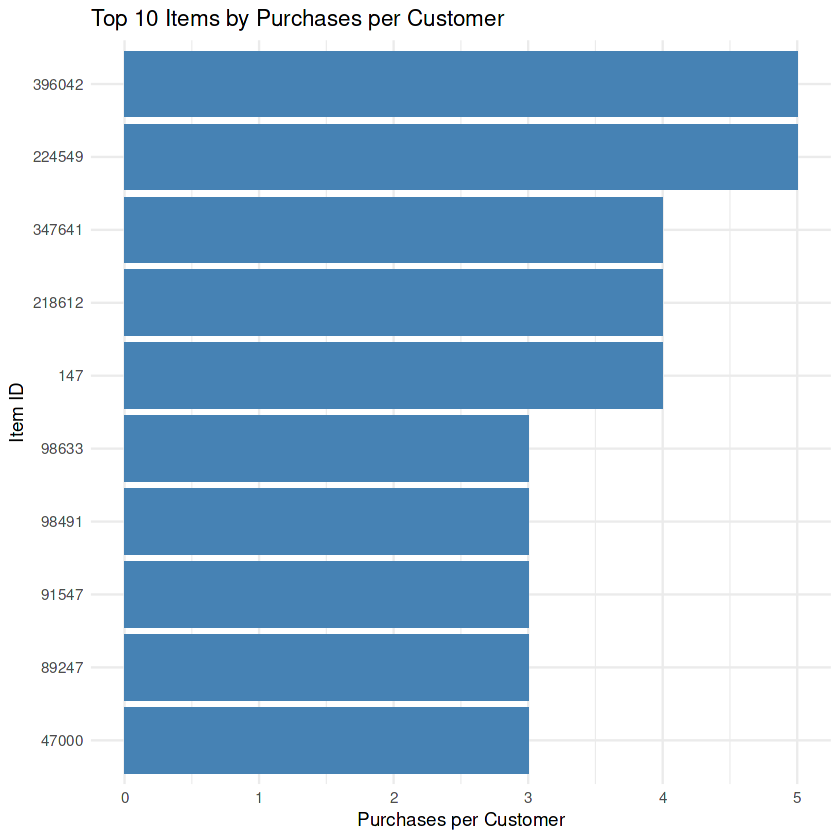

In [36]:
library(ggplot2)

ggplot(purchases_per_customer,
       aes(x = reorder(as.factor(itemid), purchases_per_customer),
           y = purchases_per_customer)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Top 10 Items by Purchases per Customer",
    x = "Item ID",
    y = "Purchases per Customer"
  ) +
  theme_minimal()


**Insight:** A small number of items drive a disproportionately high number of purchases, suggesting opportunities to prioritize these products in promotions and inventory planning.


## Conclusion

This analysis of the Retail Rocket e-commerce platform provides key insights into user behavior, conversion trends, and high-performing products, helping to guide strategies for revenue growth and customer retention.  

**Summary of Findings:**  

- **Conversion Funnel:** Only **2.6%** of users who view products add them to their cart, and **0.84%** complete a purchase. The largest drop-off occurs at the **view-to-add-to-cart stage**, indicating an opportunity to improve product page engagement and calls-to-action.  
- **Peak Purchase Hours:** Purchases are highest between **6–8 PM**, highlighting the most effective time for marketing campaigns and promotions.  
- **Top Categories and Products:** The **top 10 categories** generate roughly **30% of revenue**, and a small number of high-value items drive the majority of purchases.  
- **Customer Loyalty:** Certain products show high **purchases per customer**, signaling strong loyalty and opportunities for targeted retention campaigns.  

**Recommendations:**  

1. **Optimize Product Pages:** Enhance product information, images, and calls-to-action to increase add-to-cart conversions.  
2. **Time Marketing Strategically:** Schedule campaigns and promotions during peak purchase hours to maximize effectiveness.  
3. **Prioritize Inventory and Promotions:** Ensure high-performing categories and items are well-stocked and prominently featured.  
4. **Drive Retention:** Focus on loyalty-driving items with personalized recommendations and repeat purchase incentives.  

**Final Takeaway:**  
By addressing early-stage conversion drop-offs, aligning marketing efforts with peak purchase hours, and focusing on high-performing products and repeat purchase behavior, Retail Rocket can improve overall conversions and strengthen customer retention.



## Limitations
- The dataset does not include demographic, geographic, or device-level information.
- Purchase timestamps reflect server time rather than users’ local time.
- Pricing data is not available; purchase counts were used as a proxy for performance.
- External factors such as promotions or seasonality are not captured in the dataset.


## Future Work / Next Steps

To build on this analysis and drive further insights, the following steps are recommended:

1. **Cohort and Retention Analysis:** Examine repeat purchase behavior over time to identify loyal customer segments and retention opportunities.  
2. **Seasonal and Day-of-Week Trends:** Analyze variations in purchasing patterns to optimize marketing campaigns, promotions, and inventory planning.  
3. **Recommendation System Evaluation:** Assess how top-performing products and categories can be incorporated into personalized recommendation algorithms to increase conversions.  
4. **User Segmentation:** Segment users based on behavior, device type, or marketing channel to deliver more tailored experiences and improve engagement.  
5. **Funnel Optimization:** Explore micro-drop-offs within the conversion funnel to identify additional opportunities for improving checkout efficiency and reducing cart abandonment.


## Data Source

This analysis is based on a cleaned subset derived from the original Retailrocket E-commerce dataset on Kaggle:  
https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset :contentReference[oaicite:1]{index=1}

The following cleaned input files were created from this source for analysis in this notebook:
- `clean_events.csv`
- `retail-rocket-clean-purchases-by-category`


## Data Description

This analysis uses anonymized e-commerce event and purchase data from the Retail Rocket platform.  
The dataset captures user interactions such as product views, add-to-cart actions, and completed purchases, along with timestamps and item/category information.  

The cleaned datasets include additional features such as date, hour, and purchase indicators, allowing detailed exploration of user behavior, conversion trends, and top-performing products.  

These datasets provide a foundation for understanding how user activity translates into purchases and which products or categories drive revenue.
